In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas_datareader as pdr
import numpy as np
import numpy as np
from scipy.interpolate import make_interp_spline

In [11]:
#
# Make some graphs - temperature line plots first
# For just one month
#

month_name = 'February'
addyear = '2023'
r = 91

path = '/Volumes/Elements/code/readexcel/'
span = 'three_month_temps.xlsx'
wxdata = f'{path}{span}'
#wxdata = f'{path}{month_name}_{addyear}.xlsx'
getWXdata = pd.read_excel(wxdata)
#getWXdata = getWXdata.drop((r), axis=0)   
print(getWXdata)

   
HI = getWXdata['High']
LO = getWXdata["Low"]
DATE = getWXdata["Date"]
   
y = HI.to_numpy()
y1 = LO.to_numpy()
x = DATE.to_numpy()
print(x)

#define x as 200 equally spaced values between the min and max of original x 
xnew = np.linspace(x.min(), x.max(), 200) 

#define spline
HIspl = make_interp_spline(x, y, k=2)
y_smooth = HIspl(xnew)
LOspl = make_interp_spline(x, y1, k=2)
y1_smooth = LOspl(xnew)

#Plot the results in matplotlib

plt.figure(figsize= (26, 17))
plt.locator_params(axis='x', nbins= r)
plt.xlim(1, r)
plt.ylim(-15, 105)
plt.xticks(fontsize=24)
plt.xlabel('Date', fontsize=24, fontweight ='bold')
plt.yticks(fontsize=24)
plt.ylabel('Temperature (F)', fontsize=24, fontweight ='bold')
plt.locator_params(axis='y', nbins=20)
plt.title(f'{month_name} {addyear} Temperatures', fontsize=40, fontweight ='bold')
plt.grid(axis = "y", linewidth = 2.0, color = 'black')
plt.plot(xnew,y_smooth,color = "red", linewidth =5, label ="High")
plt.plot(xnew,y1_smooth,color = "blue", linewidth =5, label ="Low")
plt.legend(fontsize=40)
plt.savefig(f'{path}{month_name}temps_{addyear}')


    Date1 Date2  Date3  Date  High  Low
0      12     /      1  12/1    43   30
1      12     /      2  12/2    43   26
2      12     /      3  12/3    59   38
3      12     /      4  12/4    46   30
4      12     /      5  12/5    49   24
..    ...   ...    ...   ...   ...  ...
85      2     /     24  2/24    50   30
86      2     /     25  2/25    35   24
87      2     /     26  2/26    53   24
88      2     /     27  2/27    44   29
89      2     /     28  2/28    43   33

[90 rows x 6 columns]


UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

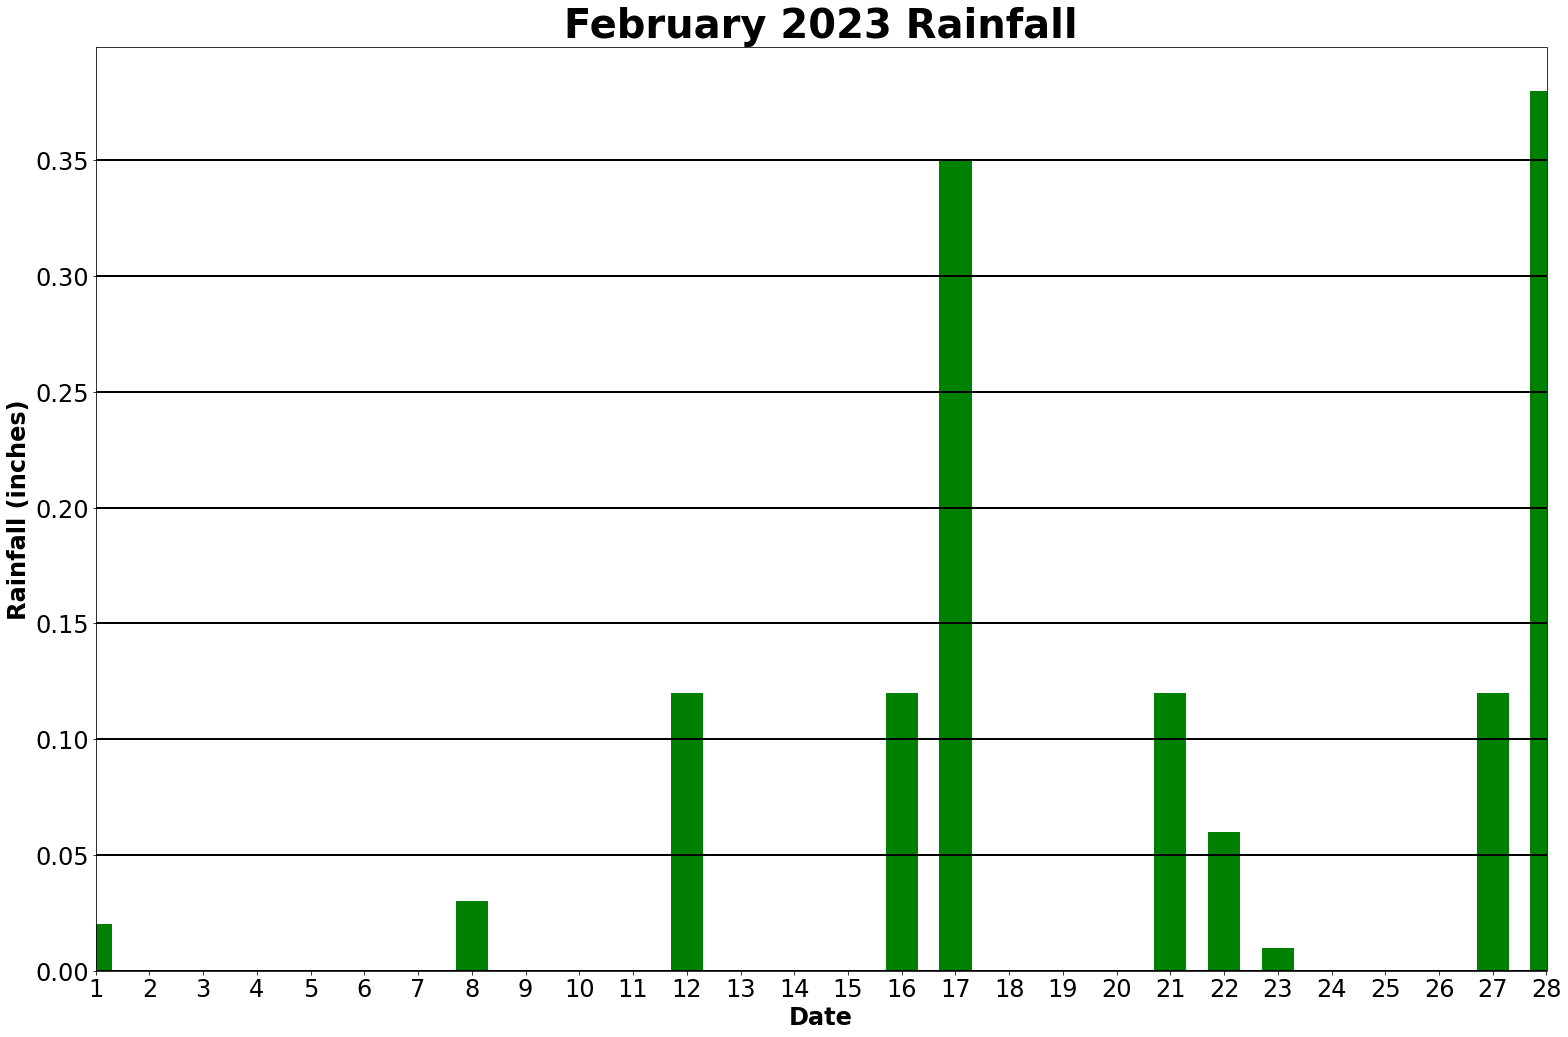

In [5]:
#
# make some graphs - now some rainfall bar plot
# For just one month
#

month_name = 'February'
addyear = '2023'
r = 28


    #Set up data
path = '/Volumes/Elements/code/readexcel/'
wxdata = f'{path}{month_name}_{addyear}.xlsx'
getWXdata = pd.read_excel(wxdata)
getWXdata = getWXdata.drop((r), axis=0)      
    
#Plot the results in matplotlib
plt.figure(figsize=(26, 17))
plt.grid(axis = "y", linewidth = 2.0, color = 'black')
plt.locator_params(axis='x', nbins= r)
plt.xlim(1, r)
plt.xticks(fontsize=24)
plt.xlabel('Date', fontsize=24, fontweight ='bold')
plt.yticks(fontsize=24)
plt.ylabel('Rainfall (inches)', fontsize=24, fontweight ='bold')
plt.locator_params(axis='y', nbins=10)
plt.title(f'{month_name} {addyear} Rainfall', fontsize=40, fontweight ='bold')
plt.bar(getWXdata["Date"],getWXdata["Rainfall"], color = "green", width= 0.6)
plt.savefig(f'{path}{month_name}rainfall_{addyear}') 